In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def define_mask():
    mask=[[1,1,1],[1,1,1],[1,1,1]] 
    #mask , mask[1][2],mask[0][0],mask[2][2] # mask [3][1] error
    for i in range (3):
        for j in range (3):
            print (mask[i][j],end=" ")
        print()
    return mask

In [3]:
def my_Dilation(img_1,mask):
    m=img_1.shape[0]
    n=img_1.shape[1]
    img_2=np.random.randint(0,1,(m,n))
    #neden "for"larda 1'den başlıyoruz ? çünkü mask'ı en tepeye koyduğumuzda taşar.
    for i in range (1,m-1):
         for j in range (1,n-1):
            #print(i,j,img_1[i,j])
            #apply_mask_1 for Dilation
            
            x_1=img_1[i,j] and mask[1][1] #x_1 merkez
            x_2=img_1[i-1,j-1] and mask[0][0]
            x_3=img_1[i-1,j] and mask[0][1]
            x_4=img_1[i-1,j+1] and mask[0][2]
            x_5=img_1[i+1,j-1] and mask[2][0]
            x_6=img_1[i+1,j] and mask[2][1]
            x_7=img_1[i+1,j+1] and mask[2][2]    
            x_8=img_1[i,j-1] and mask[1][0]
            x_9=img_1[i,j+1] and mask[1][2]

            result_1 = x_1 or x_2 or x_3 or x_4 or x_5
            result_2 = x_6 or x_7 or x_8 or x_9
            result =  result_1 or result_2
            
            img_2[i,j] = result
            
    return img_2

In [57]:
def convert_RGB_to_monochrome_BW(image_1):
    threshold=100
    img_1=plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if (img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3)>threshold:
                img_2[i,j]=0
            else:
                img_2[i,j]=1
    return img_2

In [58]:
image = r'C:\Users\Karaca\Documents\GoruntuIsleme\s-harf.jpg'

In [59]:
image_bw = convert_RGB_to_monochrome_BW(image)

In [60]:
image_mask = my_Dilation(image_bw,define_mask())

1 1 1 
1 1 1 
1 1 1 


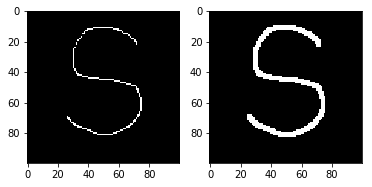

In [61]:
plt.subplot(1,2,1) , plt.imshow(image_bw , cmap="gray") #BW Resim
plt.subplot(1,2,2) , plt.imshow(image_mask , cmap="gray") #Genişletilmiş Resim
plt.show()